# Introduction

In this notebook, we will demonstrate how to use fuzzy logic to process EEG signals and classify them based on their characteristics, such as the strength of alpha and beta brainwaves. Specifically, we aim to build a fuzzy logic system that can determine the ambiguity level of EEG signals, which can be used in brain-computer interface (BCI) applications, such as playing video games using brainwaves.

The key components of this system are:

1. Fuzzy Variables: We will define fuzzy variables for:
   - Alpha wave strength: a measure of the power in the alpha frequency band of EEG signals (typically associated with relaxation).
   - Beta wave strength: a measure of the power in the beta frequency band of EEG signals (typically associated with active concentration).
   - Ambiguity level: the output of our fuzzy system, which indicates how ambiguous or clear the EEG signal is.

2. Membership Functions: For each of these variables, we will define membership functions that describe fuzzy sets (e.g., low, medium, high) for alpha and beta wave strengths, and low, moderate, and high levels of ambiguity.

3. Fuzzy Rules: We will define fuzzy logic rules that relate the alpha and beta wave strengths to the ambiguity level of the signal. These rules will mimic expert knowledge on how different brainwave patterns can indicate varying levels of signal clarity or ambiguity.

4. Fuzzy Control System: Using the `skfuzzy` library, we will create a control system that takes EEG features as inputs and computes the ambiguity level as the output.

5. Visualization: At each step, we will visualize the fuzzy variables, membership functions, and rules to help us understand how the fuzzy logic system processes the input EEG features.

6. Testing: Finally, we will test the system using example EEG data inputs (e.g., alpha and beta wave strengths), compute the ambiguity level, and visualize the output.

## Step 1: Importing Necessary Libraries

In this step, we import the required Python libraries to implement our fuzzy logic system and handle EEG data.

In [31]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

## Step 2: Defining Fuzzy Variables for EEG Features

In this step, we will define the fuzzy variables that represent the input EEG features and the output of our fuzzy logic system:

1. Alpha Wave Strength (`alpha_wave_strength`):
   - Represents the strength of the EEG signal in the alpha frequency band. This band is typically associated with a relaxed state of mind and ranges between 8-12 Hz. We will classify the alpha wave strength into fuzzy sets such as low, medium, and high.

2. Beta Wave Strength (`beta_wave_strength`):
   - Represents the strength of the EEG signal in the beta frequency band, typically associated with active thinking or concentration. This band ranges from 12-30 Hz. We will classify beta wave strength into the same fuzzy sets: low, medium, and high.

3. Ambiguity Level (`ambiguity_level`):
   - This is the output of our fuzzy system. It represents how ambiguous or clear the EEG signal is based on the input wave strengths. We will classify the ambiguity level into fuzzy sets like low (clear signal), moderate, and high (ambiguous signal).

In [32]:
# Define fuzzy variables (Antecedents for EEG features)
alpha_wave_strength = ctrl.Antecedent(np.arange(0, 11, 1), 'alpha_wave_strength')
beta_wave_strength = ctrl.Antecedent(np.arange(0, 11, 1), 'beta_wave_strength')

# Define fuzzy variable (Consequent for ambiguity level)
ambiguity_level = ctrl.Consequent(np.arange(0, 11, 1), 'ambiguity_level')


## Step 3: Defining Membership Functions for the EEG Features

In this step, we will define the membership functions for the fuzzy variables that we created in Step 2. Membership functions allow us to categorize the input variables (alpha and beta wave strengths) into fuzzy sets like low, medium, and high. Similarly, we will define membership functions for the output variable (ambiguity level) to describe levels of ambiguity (e.g., low, moderate, and high).

#### Explanation of Membership Functions:
- `automf(3)` for Alpha and Beta Wave Strengths:
  - This function automatically generates three fuzzy sets: poor (low), average (medium), and good (high). These fuzzy sets represent different degrees of wave strengths.
- Custom Membership Functions for Ambiguity Level:
  - We manually define the fuzzy sets for low, moderate, and high ambiguity using triangular membership functions (`trimf`). For example:
    - Low ambiguity: The membership function starts at 0, peaks at 0, and ends at 5.
    - Moderate ambiguity: The membership function peaks at 5 and spans from 0 to 10.
    - High ambiguity: The membership function starts at 5, peaks at 10, and ends at 10.


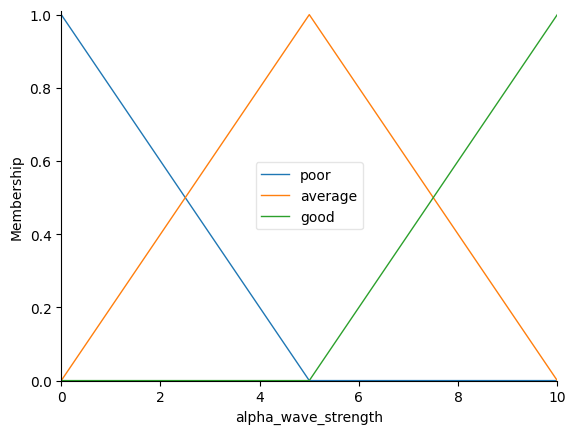

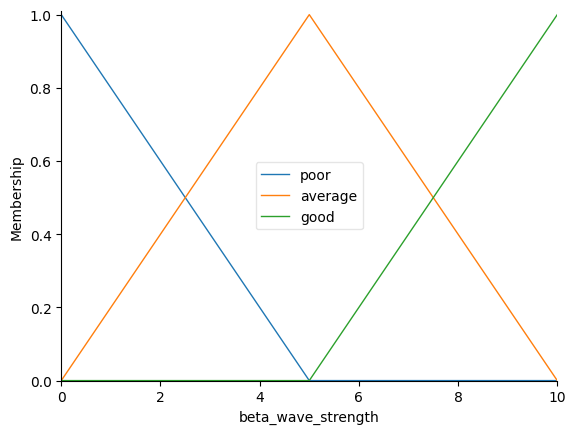

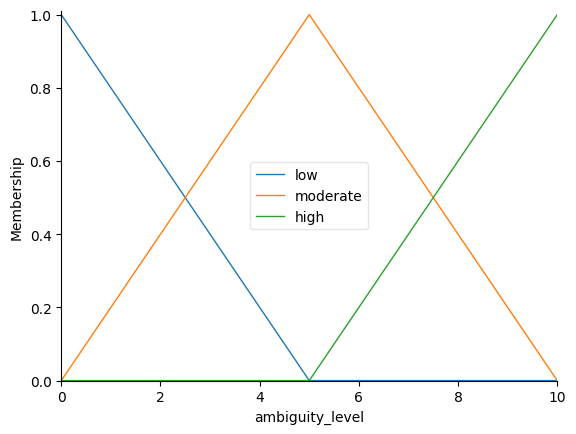

In [33]:
# Define membership functions for input variables (alpha and beta wave strengths)
alpha_wave_strength.automf(3)  # Auto-membership for alpha wave strength (low, medium, high)
beta_wave_strength.automf(3)   # Auto-membership for beta wave strength (low, medium, high)

# Define custom membership functions for output variable (ambiguity level)
ambiguity_level['low'] = fuzz.trimf(ambiguity_level.universe, [0, 0, 5])
ambiguity_level['moderate'] = fuzz.trimf(ambiguity_level.universe, [0, 5, 10])
ambiguity_level['high'] = fuzz.trimf(ambiguity_level.universe, [5, 10, 10])

# Visualize membership functions 
alpha_wave_strength.view()
beta_wave_strength.view()
ambiguity_level.view()

## Step 4: Defining Fuzzy Rules

We define the rules that map the relationships between the input variables (`alpha_wave_strength` and `beta_wave_strength`) and the output variable (`ambiguity_level`).

- Rule 1: If both alpha and beta wave strengths are low, ambiguity is high.
- Rule 2: If either alpha or beta wave strength is average, ambiguity is moderate.
- Rule 3: If both alpha and beta wave strengths are high, ambiguity is low.

In [34]:
# Define fuzzy rules
rule1 = ctrl.Rule(alpha_wave_strength['poor'] & beta_wave_strength['poor'], ambiguity_level['high'])
rule2 = ctrl.Rule(alpha_wave_strength['average'] | beta_wave_strength['average'], ambiguity_level['moderate'])
rule3 = ctrl.Rule(alpha_wave_strength['good'] & beta_wave_strength['good'], ambiguity_level['low'])

## Step 5: Creating the Control System

We now create the control system using the defined rules, and prepare it for simulation.


In [35]:
# Creating the fuzzy control system and simulation object
eeg_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
eeg_simulation = ctrl.ControlSystemSimulation(eeg_ctrl)

## Step 6: Testing the System with Example EEG Data

We test the system using some sample input values for `alpha_wave_strength` and `beta_wave_strength`. These values would typically come from real or simulated EEG data.

Computed Ambiguity Level: 5.000000000000001


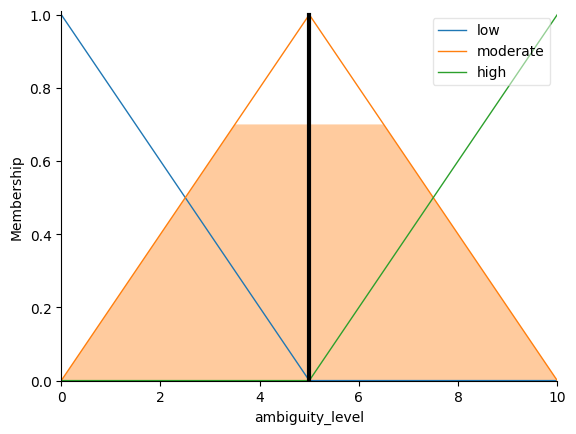

In [36]:
# Input sample values for testing (Example: Real EEG data features would go here)
eeg_simulation.input['alpha_wave_strength'] = 6.5 
eeg_simulation.input['beta_wave_strength'] = 3.0   

# Compute the result
eeg_simulation.compute()

# Output the result (ambiguity level)
print(f"Computed Ambiguity Level: {eeg_simulation.output['ambiguity_level']}")

# Visualizing the computed ambiguity level output
ambiguity_level.view(sim=eeg_simulation)



### Plot explaination

1. Membership Functions:
   - The plot displays the triangular membership functions for the ambiguity level.
   - There are three fuzzy sets for ambiguity:
     - Low Ambiguity (blue line): Valid for values close to 0.
     - Moderate Ambiguity (orange line): Peaks at 5.
     - High Ambiguity (green line): Valid for values close to 10.

2. Current Computed Output:
   - The black vertical line in the middle of the plot shows the defuzzified output, which is the final result computed by the fuzzy control system.
   - This line indicates that the ambiguity level computed by the system is close to 5, which lies between moderate and low ambiguity.
   - The shaded orange area represents the degree to which the system considers the computed ambiguity as being part of the "moderate" fuzzy set.

### Interpreting the Results:
- Based on this plot, the system has classified the ambiguity level as moderate (since the peak of the output is close to the center of the "moderate" set).
- This result means that given the current input values for the alpha and beta wave strengths, the EEG signal is somewhat clear but still shows some degree of uncertainty or ambiguity.

## Step 7: Testing Different Combinations of Input Values

In this step, we will adjust the values for the alpha and beta wave strengths to see how the fuzzy control system responds.


In [37]:
# Function to test and visualize the system with given inputs
def test_fuzzy_system(alpha_input, beta_input):
    # Set the input values for alpha and beta wave strengths
    eeg_simulation.input['alpha_wave_strength'] = alpha_input
    eeg_simulation.input['beta_wave_strength'] = beta_input
    
    # Compute the result
    eeg_simulation.compute()
    
    # Print the computed ambiguity level
    print(f"Alpha: {alpha_input}, Beta: {beta_input}, Computed Ambiguity Level: {eeg_simulation.output['ambiguity_level']}")
    
    # Visualize the output for ambiguity level
    ambiguity_level.view(sim=eeg_simulation)

## Tested scenario - we will test the following scenarios:

1. Scenario 1: Low alpha and low beta wave strengths.
2. Scenario 2: High alpha and low beta wave strengths.
3. Scenario 3: Low alpha and high beta wave strengths.
4. Scenario 4: High alpha and high beta wave strengths.
5. Scenario 5: Moderate values for both alpha and beta.

### Explanation of Scenarios:

1. Scenario 1 (Low alpha, Low beta): 
   - Both alpha and beta wave strengths are low, indicating weak signals in both bands. This scenario should produce a high ambiguity level.
   
2. Scenario 2 (High alpha, Low beta): 
   - Strong alpha wave activity with weak beta wave activity. The ambiguity level might be moderate since one band is strong, but the other is weak.
   
3. Scenario 3 (Low alpha, High beta): 
   - Weak alpha wave activity with strong beta wave activity. Similar to scenario 2, this may result in moderate ambiguity.
   
4. Scenario 4 (High alpha, High beta): 
   - Both alpha and beta wave strengths are high, indicating strong signals in both bands. This scenario should produce a low ambiguity level, as the signal is likely clear.
   
5. Scenario 5 (Moderate alpha, Moderate beta): 
   - Alpha and beta wave strengths are set to moderate values. This scenario should result in a moderate ambiguity level.

### Expected Results:

- Scenario 1: The computed ambiguity level is expected to be high.
- Scenario 2: The computed ambiguity level is expected to be moderate.
- Scenario 3: The computed ambiguity level is expected to be moderate.
- Scenario 4: The computed ambiguity level is expected to be low.
- Scenario 5: The computed ambiguity level is expected to be moderate.


Scenario 1: Low alpha and low beta wave strengths
Alpha: 2.0, Beta: 2.0, Computed Ambiguity Level: 5.878048780487805


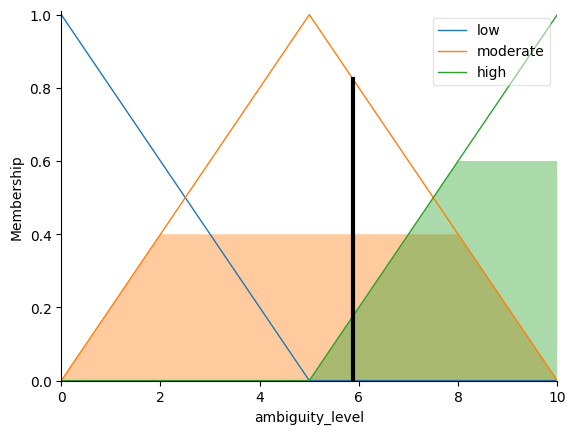

In [38]:
print("Scenario 1: Low alpha and low beta wave strengths")
test_fuzzy_system(alpha_input=2.0, beta_input=2.0)

Scenario 2: High alpha and low beta wave strengths
Alpha: 8.0, Beta: 2.0, Computed Ambiguity Level: 5.0


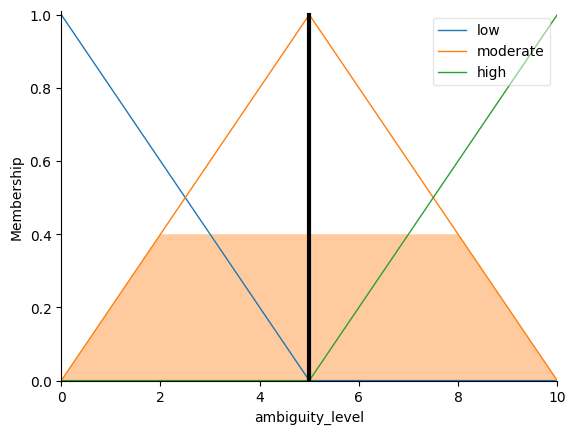

In [39]:
print("Scenario 2: High alpha and low beta wave strengths")
test_fuzzy_system(alpha_input=8.0, beta_input=2.0)


Scenario 3: Low alpha and high beta wave strengths
Alpha: 2.0, Beta: 8.0, Computed Ambiguity Level: 5.0


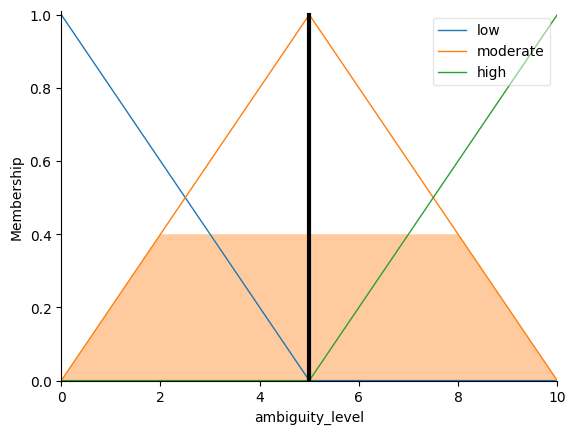

In [40]:
print("Scenario 3: Low alpha and high beta wave strengths")
test_fuzzy_system(alpha_input=2.0, beta_input=8.0)


Scenario 4: High alpha and high beta wave strengths
Alpha: 8.0, Beta: 8.0, Computed Ambiguity Level: 4.121951219512195


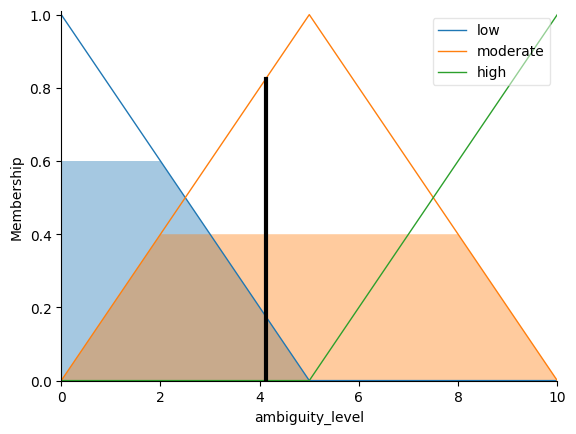

In [41]:
print("Scenario 4: High alpha and high beta wave strengths")
test_fuzzy_system(alpha_input=8.0, beta_input=8.0)

Scenario 5: Moderate alpha and beta wave strengths
Alpha: 5.0, Beta: 5.0, Computed Ambiguity Level: 5.000000000000001


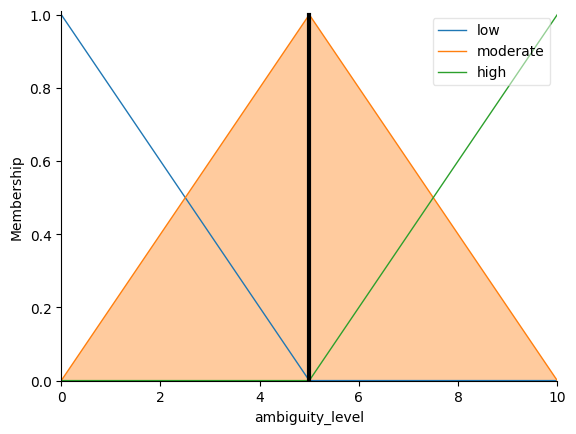

In [42]:
print("Scenario 5: Moderate alpha and beta wave strengths")
test_fuzzy_system(alpha_input=5.0, beta_input=5.0)